# This notebook will be mainly used for the capstone project for Coursera dat sicience project

<h2 align=center><font size = 8>Applied Data Science Capstone</font></h2>

Research Topic: Predict severity of vehicles accident in Seattle by building machine Learning model

Traffic Accidents and Vehicles - Model Training
Detailed dataset of road accidents and involved vehicles in the Seattle

1. Problem Description:
Cars accidents are the serious and significant challenge of our modern and busy life. "Seattle’s status as the country’s fastest-growing city — adding 19,901 people since the 2016 report — is a backdrop to the traffic rundown," - Material from The Seattle Times. There is not a well-established mass-transit system in Seattle, most of the residents are drivers. Road congestion, collisions and traffic accident is equally high and is the major cause of death in Seattle. Combined with Seattle's famous rainy weather, car accidents are an hourly occurrence. 
Thus, the weather and the road conditions are two factors that can support to predict the possibility of getting into a car accident and provide recommendation to drive more careful or change travel plans to avoid car accidents and reduce accidence rate in the city.

2. Data cleaning & Prepocessing and Transformation:
The project begins, by using Jupyter Notebook, web-based multi-functional interactive tool used for programming, visualization and coding
I will use the Notebook to build the code based on CVS file, this Dataset includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present. All collisions provided by SPD and recorded by Traffic Records in Seattle. 

Data cleanup is needed to start analysis and data methodology. Followed changes to clean up data performed on Dataset:
- N/A values remove
- colums drop (irrelevant, like time when accident happened)

The model to be able to analyze and predict the severity of a crash regardless of when it happened.


In [1]:
# Imports and initial setup

import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt


#from scipy.stats import chi2_contingency
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [2]:
print("Hello Capstone Project Course!")

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Hello Capstone Project Course!
Matplotlib version:  3.3.0
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<hr>
<div id="downloading_data"> 
    <h2>Downloading the and reading data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [55]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-30 12:33:59--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  22.6MB/s    in 3.2s    

2020-08-30 12:34:03 (21.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [56]:
df = pd.read_csv("Data-Collisions.csv",delimiter=",")
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [57]:
# Dataframe information
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [58]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [59]:
df.index.values

array([     0,      1,      2, ..., 194670, 194671, 194672])

In [60]:
#check how many null objects we have in the dataset as follows:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

<hr>

 <h2>Data cleanup and pre-processing</h2>
 Using <b>my_data</b> as the Data-Collisions.csv data read by pandas, declare the following variables: <br>

Data cleaning & Prepocessing and Transformation:
The project begins, by using Jupyter Notebook, web-based multi-functional interactive tool used for programming, visualization and coding
I will use the Notebook to build the code based on CVS file, this Dataset includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present. All collisions provided by SPD and recorded by Traffic Records in Seattle. 

Data cleanup is needed to start analysis and data methodology. Followed changes to clean up data performed on Dataset:
1. Removal of Non Relevant Features
This dataset contains 194,674 records. Each with 34 features, including the target one we want to predict. However, not all these features will be useful or relevant towards our goal. The file Collisions All Year.pdf (Metadata form) – contains a description of features. By reading it, its possible to identifiy some features that can be disregarded from the outset. 
The following features will be removed from Data analysis. Either because they aren't relevant to problem or create redudancy:

2. N/A values remove, all rows contains NA values will be removed and this changes resulted 182,660 records. It was dropped 6.2% of the samples due to inconsistent values and we have dropped 22 features that weren't meaningful. The next step is to check a few numerical features
For atributes 'ROADCOND','LIGHTCOND','WEATHER','COLLISIONTYPE' decided to remove samples including NA values, In this instance this as of no consequence. However, it could be necesary to consider removing such data to reduce the noise it might generate.

The model to be able to analyze and predict the severity of a crash regardless of when it happened.

3. Transforming 
One more change on data was applied, but did not dropp any further samples. 
As all features in this dataset are categorical, and Sklearn Decision Trees do not handle categorical variables. Need to convert these features to numerical values pandas.get_dummies() - Convert categorical variable into dummy/indicator variables.

4. Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [61]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
drop = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE', 'INCDTTM', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']
df.drop(drop, axis=1, inplace=True)

#rename column
df.rename(columns={'LOCATION':'ADDRESS'}, inplace=True)
df.columns
df.head()

,SEVERITYCODE,ADDRTYPE,ADDRESS,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,10,Entering at angle
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,32,One parked--one moving
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,23,From same direction - all others
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10,Entering at angle


In [62]:
#Dropping Rows with at least 1 null value

# 1. making new data frame with dropped NA values 
new_df = df.dropna(axis = 0, how ='any') 
  
# 2. comparing sizes of data frames 
print("Old data frame length:", len(df), "\nNew data frame length:",  
       len(new_df), "\nNumber of rows with at least 1 NA value: ", 
       (len(df)-len(new_df))) 

Old data frame length: 194673 
New data frame length: 182660 
Number of rows with at least 1 NA value:  12013


In [11]:
#df = pd.read_csv("Data-Collisions.csv",delimiter=",")
new_df.head()

,SEVERITYCODE,ADDRTYPE,ADDRESS,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,10,Entering at angle
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,32,One parked--one moving
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,23,From same direction - all others
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10,Entering at angle


In [12]:
#check how many null objects we have in the dataset as follows:
new_df.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
ADDRESS          0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
SDOT_COLDESC     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
dtype: int64

In [13]:
#quick summary of each column in our dataframe
new_df.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
count,182660.000000,182660.000000,182660.000000,182660.000000,182660.000000,182660.000000
mean,1.309843,2.476902,0.038958,0.029848,1.972358,14.368986
std,0.462430,1.371036,0.202886,0.171482,0.563108,6.481221
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000


In [14]:
# review Roadcond data
new_df['ROADCOND'].value_counts()

Dry               122002
Wet                46671
Unknown            11479
Ice                 1176
Snow/Slush           977
Other                123
Standing Water       108
Sand/Mud/Dirt         64
Oil                   60
Name: ROADCOND, dtype: int64

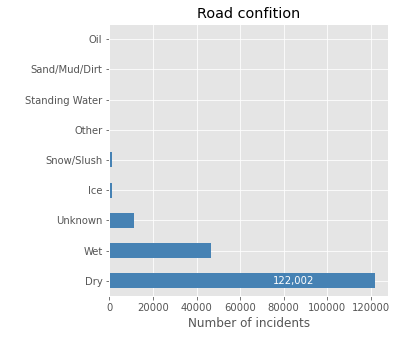

In [15]:
# generate plot - a stacked horizontal bar chart

df_road = new_df['ROADCOND'].value_counts()
df.sort_values(by='ROADCOND', ascending=False, axis=0, inplace=True)

df_road.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of incidents')
plt.title('Road confition')

# annotate value labels to each bar
for index, value in enumerate(df_road): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [16]:
new_df['LIGHTCOND'].value_counts()

Daylight                    113710
Dark - Street Lights On      47500
Unknown                      10413
Dusk                          5768
Dawn                          2450
Dark - No Street Lights       1444
Dark - Street Lights Off      1154
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

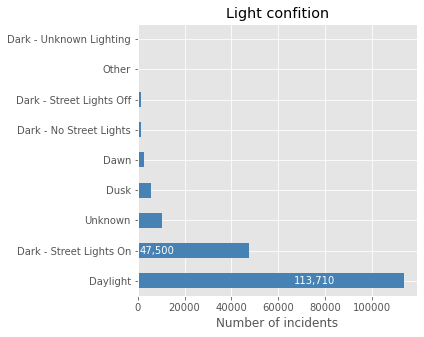

In [17]:
# generate plot

df_light = new_df['LIGHTCOND'].value_counts()
df.sort_values(by='LIGHTCOND', ascending=False, axis=0, inplace=True)

df_light.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of incidents')
plt.title('Light confition')

# annotate value labels to each bar
for index, value in enumerate(df_light): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [18]:
new_df['WEATHER'].value_counts()

Clear                       108923
Raining                      32616
Overcast                     27155
Unknown                      11597
Snowing                        881
Other                          742
Fog/Smog/Smoke                 555
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

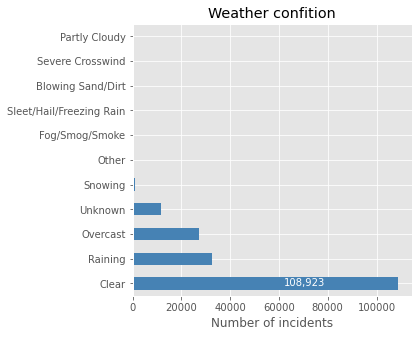

In [19]:
# generate plot

df_weather = new_df['WEATHER'].value_counts()
df.sort_values(by='WEATHER', ascending=False, axis=0, inplace=True)

df_weather.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of incidents')
plt.title('Weather confition')

# annotate value labels to each bar
for index, value in enumerate(df_weather): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [20]:
new_df['COLLISIONTYPE'].value_counts()

Parked Car    43019
Angles        34444
Rear Ended    33639
Other         22860
Sideswipe     18282
Left Turn     13637
Pedestrian     6497
Cycles         5358
Right Turn     2929
Head On        1995
Name: COLLISIONTYPE, dtype: int64

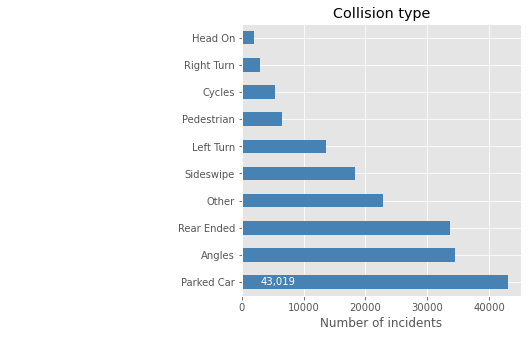

In [21]:
# generate plot

df_collision = new_df['COLLISIONTYPE'].value_counts()
df.sort_values(by='COLLISIONTYPE', ascending=False, axis=0, inplace=True)

df_collision.plot(kind='barh', figsize=(5, 5), color='steelblue')
plt.xlabel('Number of incidents')
plt.title('Collision type')

# annotate value labels to each bar
for index, value in enumerate(df_collision): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 40000, index - 0.10), color='white')
plt.show()

In [22]:
new_df['SEVERITYCODE'].value_counts()

1    126064
2     56596
Name: SEVERITYCODE, dtype: int64

In [23]:
X = new_df[['ROADCOND','LIGHTCOND','WEATHER','COLLISIONTYPE']].values
X[0:10]

array([['Wet', 'Daylight', 'Overcast', 'Angles'],
       ['Wet', 'Dark - Street Lights On', 'Raining', 'Sideswipe'],
       ['Dry', 'Daylight', 'Overcast', 'Parked Car'],
       ['Dry', 'Daylight', 'Clear', 'Other'],
       ['Wet', 'Daylight', 'Raining', 'Angles'],
       ['Dry', 'Daylight', 'Clear', 'Angles'],
       ['Wet', 'Daylight', 'Raining', 'Angles'],
       ['Dry', 'Daylight', 'Clear', 'Cycles'],
       ['Dry', 'Daylight', 'Clear', 'Parked Car'],
       ['Dry', 'Daylight', 'Clear', 'Angles']], dtype=object)


As all features in this dataset are categorical, and Sklearn Decision Trees do not handle categorical variables. 
Need to convert these features to numerical values pandas.get_dummies() - Convert categorical variable into dummy/indicator variables.

In [24]:
#from sklearn import preprocessing #pd.get_dummies(df, columns=['ROADCOND'])
from sklearn import preprocessing

le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry',
             'Wet',
             'Unknown',
             'Ice',
             'Snow/Slush',
             'Other',
             'Standing Water',
             'Sand/Mud/Dirt',
             'Oil'])
X[:,0] = le_road.transform(X[:,0]) 

le_light = preprocessing.LabelEncoder()
le_light.fit(['Daylight', 
              'Dark - Street Lights On',
              'Unknown',
              'Dusk',
              'Dawn',
              'Dark - No Street Lights',
              'Dark - Street Lights Off',
              'Other',
              'Dark - Unknown Lighting'])

X[:,1] = le_light.transform(X[:,1])

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear', 
                'Raining',
                'Overcast',
                'Unknown',
                'Snowing',
                'Other',
                'Fog/Smog/Smoke',
                'Sleet/Hail/Freezing Rain',
                'Blowing Sand/Dirt',
                'Severe Crosswind',
                'Partly Cloudy'])
X[:,2] = le_weather.transform(X[:,2]) 

le_coltype = preprocessing.LabelEncoder()
le_coltype.fit(['Parked Car', 
                'Angles',
                'Rear Ended',
                'Other',
                'Sideswipe',
                'Left Turn',
                'Pedestrian',
                'Cycles',
                'Right Turn',
                'Head On'])
X[:,3] = le_coltype.transform(X[:,3]) 


X[0:10]

array([[8, 5, 4, 0],
       [8, 2, 6, 9],
       [0, 5, 4, 5],
       [0, 5, 1, 4],
       [8, 5, 6, 0],
       [0, 5, 1, 0],
       [8, 5, 6, 0],
       [0, 5, 1, 1],
       [0, 5, 1, 5],
       [0, 5, 1, 0]], dtype=object)

In [25]:
#target varible 

new_df["SEVERITYCODE"].apply(str)
new_df["SEVERITYCODE"] = new_df["SEVERITYCODE"].apply(str)
y = new_df["SEVERITYCODE"]
y[0:10]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    2
1    1
2    1
3    1
4    2
5    1
6    1
7    2
8    1
9    2
Name: SEVERITYCODE, dtype: object

Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.5051971 ,  0.39234652,  0.3792935 , -1.58981626],
       [ 1.5051971 , -1.40859373,  1.11216228,  1.60049371],
       [-0.69408639,  0.39234652,  0.3792935 ,  0.18257817],
       [-0.69408639,  0.39234652, -0.72000968, -0.17190072],
       [ 1.5051971 ,  0.39234652,  1.11216228, -1.58981626]])